In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
# import csv file into Jupyter
df = pd.read_csv ('C:/Users/12248/Desktop/WGU/D206 Data Cleaning/Churn Data and Dictionary Files/churn_raw_data.csv')
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [3]:
# rename headers for "item" 1 through 8 for better understanding
df.rename(columns = {'item1':'Timely_Responses',
                    'item2':'Timely_Fixes',
                    'item3':'Timely_Replacements',
                    'item4':'Reliability',
                    'item5':'Options',
                    'item6':'Respectful_Responses',
                    'item7':'Courteous_Exchange',
                    'item8':'Active_Listening'},
         inplace=True)
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Responses,Courteous_Exchange,Active_Listening
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [4]:
# dropping of unnamed column 
df.drop(columns='Unnamed: 0', inplace = True)
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Responses,Courteous_Exchange,Active_Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [5]:
# check and remove duplicates
df[df.duplicated(keep=False)]

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Responses,Courteous_Exchange,Active_Listening


In [6]:
# to double check if any duplicates were removed which none existed in dataset thankfully
len(df)

10000

In [7]:
# get a list of data types and  number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

In [8]:
# view the stats of the dataset
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Responses,Courteous_Exchange,Active_Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [9]:
# creating a new dataset and remove the less meaningful columns from the statistics
df_stats = df.drop(columns=['CaseOrder', 'Zip', 'Lat', 'Lng'])
df_stats.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Responses,Courteous_Exchange,Active_Listening
count,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [10]:
# Getting the total number of null values for each column. So many!
data_nulls = df_stats.isnull().sum()
print(data_nulls)

Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilli

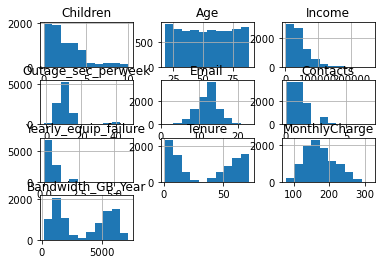

In [11]:
# Before treating missing or null values, generate histograms for important columns. No obvious outliers visible at this time.
df_stats[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
plt.show()

In [12]:
# Using univariate imputation on the null values for both numerical and categorical variables
df_stats['Children'] = df['Children'].fillna(df['Children'].median())
df_stats['Age'] = df['Age'].fillna(df['Age'].median())
df_stats['Income'] = df['Income'].fillna(df['Income'].median())
df_stats['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df_stats['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median())
df_stats['Techie'] = df['Techie'].fillna(df['Techie'].mode()[0])
df_stats['Phone'] = df['Phone'].fillna(df['Phone'].mode()[0])
df_stats['TechSupport'] = df['TechSupport'].fillna(df['TechSupport'].mode()[0])

In [13]:
# Confirming the results of the replaced values from null to median or mode which will ensure no more existing null values in dataset
data_nulls = df_stats.isnull().sum()
print(data_nulls)

Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB

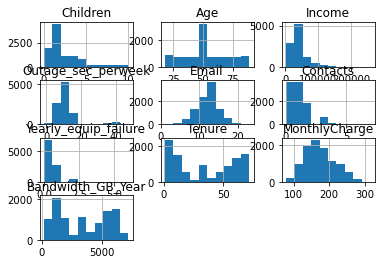

In [14]:
# After dealing with missing or null values, generate histograms for important columns.
# Compare treated histograms with untreated histograms to determine if there were any drastic changes which slightly effected Age.
df_stats[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
plt.show()

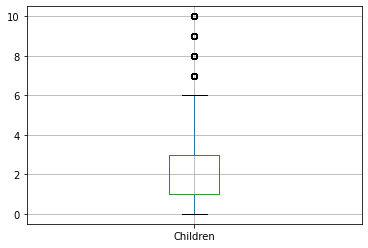

In [15]:
# Definitely seeing outliers for Children. I've decided to retain these outliers as explained in assessment.
df_stats.boxplot(['Children'])
plt.show()

In [16]:
# Counting number of customers with outliers (7 or more children). 149 + 158 + 70 + 74 = 451 outliers.
# I've decided to retain these outliers as explained in assessment.
df_stats['Children'].value_counts()

1.0     4369
0.0     1919
2.0     1100
3.0     1096
4.0      769
5.0      161
8.0      158
7.0      149
6.0      135
10.0      74
9.0       70
Name: Children, dtype: int64

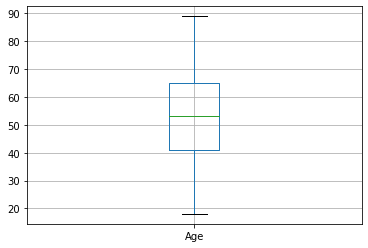

In [17]:
# When viewing the Age variable in a boxplot as opposed to a histogram you can see there are no outliers.
# The change in histogram shape is due to the imputation on null values which is expected.
df_stats.boxplot(['Age'])
plt.show()

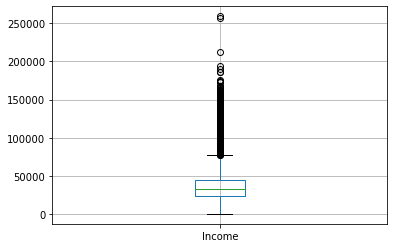

In [18]:
# More outliers detected for Income. I've decided to retain these outliers as explained in assessment.
df_stats.boxplot(['Income'])
plt.show()

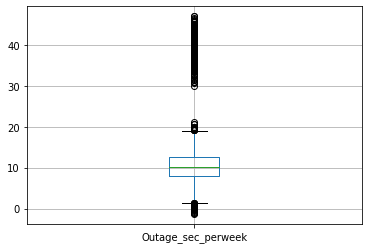

In [19]:
# Many Outliers as there are too many within the range of the highest value.
df_stats.boxplot(['Outage_sec_perweek'])
plt.show()

In [20]:
# Dropping the Outage_sec_perweek variable instead of removing outliers because too many and may effect analysis. New dataset.
df_stats2 = df_stats.drop(columns=['Outage_sec_perweek'])
df_stats2.describe()

,Population,Children,Age,Income,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Responses,Courteous_Exchange,Active_Listening
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,1.822500,53.207500,38256.017897,12.016000,0.994200,0.398000,34.656864,174.076305,3397.166397,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,1.925971,18.003457,24747.872761,3.025898,0.988466,0.635953,25.182812,43.335473,2072.718575,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,18.000000,740.660000,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,1.000000,41.000000,23660.790000,10.000000,0.000000,0.000000,8.700329,141.071078,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.000000,53.000000,33186.785000,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.000000,65.000000,45504.192500,14.000000,2.000000,1.000000,60.153487,203.777441,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.000000,89.000000,258900.700000,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


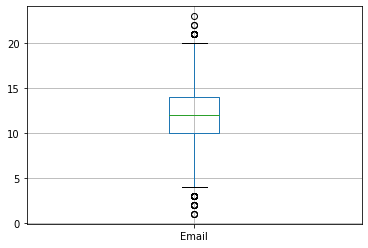

In [21]:
# More outliers found here.
df_stats2.boxplot(['Email'])
plt.show()

In [22]:
# Counting outliers (emails < 4 and > 20). 3 + 6 + 14 + 12 + 2 + 1 = 38 outliers present.
df_stats2['Email'].value_counts()

12    1310
11    1291
13    1268
10    1074
14    1060
15     779
9      774
8      543
16     517
17     351
7      316
18     203
6      185
5      109
19     100
20      51
4       31
3       14
21      12
2        6
1        3
22       2
23       1
Name: Email, dtype: int64

In [23]:
# create new variable for zscore for Email
df_stats2['Z_Score_Email']=stats.zscore(df_stats['Email'])

In [24]:
# compare zscore to variable values
df_stats2[['Email', 'Z_Score_Email']].head

<bound method NDFrame.head of       Email  Z_Score_Email
0        10      -0.666282
1        12      -0.005288
2         9      -0.996779
3        15       0.986203
4        16       1.316700
...     ...            ...
9995     12      -0.005288
9996     15       0.986203
9997     10      -0.666282
9998     14       0.655706
9999     17       1.647197

[10000 rows x 2 columns]>

In [25]:
# Create query for outliers.
df_stats_outliers=df_stats2.query('Z_Score_Email > 3 | Z_Score_Email < -3')

In [26]:
# Confirm outliers stored in new data frame.
df_stats_outliers['Z_Score_Email'].value_counts()

-3.310257    6
-3.640754    3
 3.299681    2
 3.630178    1
Name: Z_Score_Email, dtype: int64

In [27]:
# Drop / exclude variable outliers from initial data frame.
df_stats2.drop(df_stats2[df_stats2['Z_Score_Email'] > 3].index, inplace = True)
df_stats2.drop(df_stats2[df_stats2['Z_Score_Email'] < -3].index, inplace = True)

In [28]:
# Confirm new variable count with dropped outliers according to zscore values
df_stats2['Email'].value_counts()

12    1310
11    1291
13    1268
10    1074
14    1060
15     779
9      774
8      543
16     517
17     351
7      316
18     203
6      185
5      109
19     100
20      51
4       31
3       14
21      12
Name: Email, dtype: int64

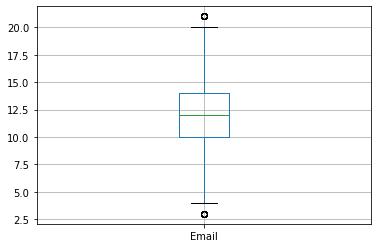

In [29]:
# Confirm dropped outliers with box plot. A few outliers remain as some are still within three standard 
# deviations from the mean. The remaining outliers will be noted.
df_stats2.boxplot(['Email'])
plt.show()

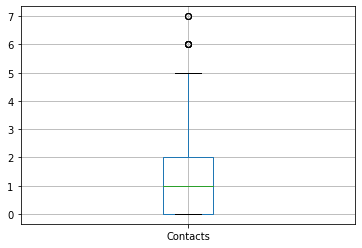

In [30]:
# And more outlier or anomaly detections
df_stats2.boxplot(['Contacts'])
plt.show()

In [31]:
# Counting outliers (contacts < 5). 5 + 3 = 8 outliers present.
df_stats2['Contacts'].value_counts()

0    3674
1    3673
2    1868
3     608
4     137
5      20
6       5
7       3
Name: Contacts, dtype: int64

In [32]:
# Drop / exclude variable outliers from initial data frame.
df_stats2.drop(df_stats2[df_stats2['Contacts'] > 5].index, inplace = True)

In [33]:
# Confirm dropped / outliers > 5 contacts. No outliers remain for this variable.
df_stats2['Contacts'].value_counts()

0    3674
1    3673
2    1868
3     608
4     137
5      20
Name: Contacts, dtype: int64

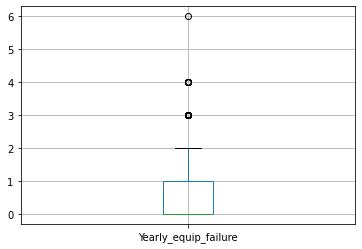

In [34]:
# more outliers for Yearly_equip_failure
df_stats2.boxplot(['Yearly_equip_failure'])
plt.show()

In [35]:
# 86 + 7 + 1 = 94 outliers.
df_stats2['Yearly_equip_failure'].value_counts()

0    6714
1    2664
2     508
3      86
4       7
6       1
Name: Yearly_equip_failure, dtype: int64

In [36]:
# Drop / exclude variable outliers from initial data frame.
df_stats2.drop(df_stats2[df_stats2['Yearly_equip_failure'] > 2].index, inplace = True)

In [37]:
# Recount total to confirm no more remaining outliers.
df_stats2['Yearly_equip_failure'].value_counts()

0    6714
1    2664
2     508
Name: Yearly_equip_failure, dtype: int64

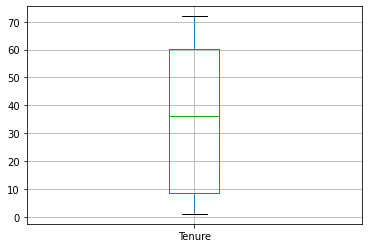

In [38]:
# No outliers detected for Tenure
df_stats2.boxplot(['Tenure'])
plt.show()

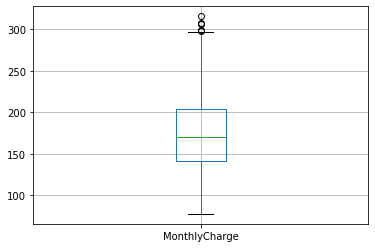

In [39]:
# Values much higher than mean but not too far off from the top whisker value. Outliers retained and noted.
df_stats2.boxplot(['MonthlyCharge'])
plt.show()

In [40]:
# taking it a step further and creating a new column and will create a zscore with scipy package
df_stats2['Z_Score_MonthlyCharge']=stats.zscore(df_stats2['MonthlyCharge'])

In [41]:
df_stats2[['MonthlyCharge', 'Z_Score_MonthlyCharge']].head

<bound method NDFrame.head of       MonthlyCharge  Z_Score_MonthlyCharge
0        171.449762              -0.061833
1        242.948015               1.587360
2        159.440398              -0.338844
3        120.249493              -1.242829
4        150.761216              -0.539039
...             ...                    ...
9995     159.828800              -0.329885
9996     208.856400               0.800996
9997     168.220900              -0.136311
9998     252.628600               1.810654
9999     218.371000               1.020461

[9886 rows x 2 columns]>

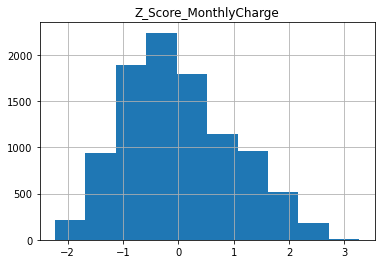

In [42]:
# Newly created column with zscore numerical measurements and histogram that shows retained outliers more visibly
df_stats2[['Z_Score_MonthlyCharge']].hist()
plt.show()

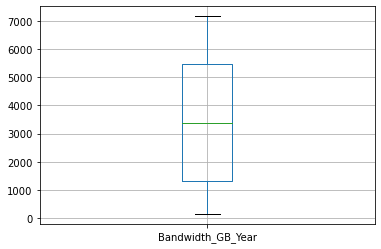

In [43]:
# no outliers visible here.
df_stats2.boxplot(['Bandwidth_GB_Year'])
plt.show()

In [44]:
# checking all possible arrays of the Employment Variable to execute Re-expression of Catagorical Variables 
# using Ordinal Encoding
df_stats2.Employment.unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [45]:
# Create a new variable in order to replace the categorical value of Employment into a numeric one
df_stats2['Employment_Numeric'] = df_stats2['Employment']

In [46]:
# Create a dictionary that will convert the categorical values automatically into numeric ones in the new column
dict_edu = {"Employment_Numeric" : {"Student" : 0, "Unemployed" : 1, "Retired" : 2, "Part Time" : 3, "Full Time" : 4}}

In [47]:
# We apply the dictionary and let Python know to replace the values of the variable. Then verify changes with info command.
df_stats2.replace(dict_edu, inplace=True)
df_stats2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9886 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_id            9886 non-null   object 
 1   Interaction            9886 non-null   object 
 2   City                   9886 non-null   object 
 3   State                  9886 non-null   object 
 4   County                 9886 non-null   object 
 5   Population             9886 non-null   int64  
 6   Area                   9886 non-null   object 
 7   Timezone               9886 non-null   object 
 8   Job                    9886 non-null   object 
 9   Children               9886 non-null   float64
 10  Age                    9886 non-null   float64
 11  Education              9886 non-null   object 
 12  Employment             9886 non-null   object 
 13  Income                 9886 non-null   float64
 14  Marital                9886 non-null   object 
 15  Gend

In [48]:
# Extract cleaned dataframe
df_stats2.to_csv(r'C:\Users\12248\Desktop\WGU\D206 Data Cleaning\Cleaned_Churn_Data.csv')

In [49]:
# Import cleaned dataset and reading newly generated dataset for PCA
churn = pd.read_csv('C:/Users/12248/Desktop/WGU/D206 Data Cleaning/Cleaned_Churn_Data.csv',index_col=0)
churn.head()

,Customer_id,Interaction,City,State,County,Population,Area,Timezone,Job,Children,...,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Responses,Courteous_Exchange,Active_Listening,Z_Score_Email,Z_Score_MonthlyCharge,Employment_Numeric
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,38,Urban,America/Sitka,Environmental health practitioner,1.0,...,5,5,3,4,4,3,4,-0.666282,-0.061833,3
1,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,...,4,3,3,4,3,4,4,-0.005288,1.587360,2
2,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,...,4,2,4,4,3,3,3,-0.996779,-0.338844,0
3,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,13863,Suburban,America/Los_Angeles,Solicitor,1.0,...,4,4,2,5,4,3,3,0.986203,-1.242829,2
4,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,11352,Suburban,America/Chicago,Medical illustrator,0.0,...,4,4,3,4,4,4,5,1.316700,-0.539039,0


In [50]:
# Identifying which variables to include
churn = churn[['Children', 'Age', 'Income', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
               'Bandwidth_GB_Year', 'Timely_Responses', 'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
               'Respectful_Responses', 'Courteous_Exchange', 'Active_Listening']]
churn.head()

,Children,Age,Income,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Responses,Courteous_Exchange,Active_Listening
0,1.0,68.0,28561.990,10,0,1,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1.0,27.0,21704.770,12,0,1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,4.0,50.0,33186.785,9,0,1,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,1.0,48.0,18925.230,15,2,0,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,0.0,83.0,40074.190,16,2,1,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [51]:
# Normalize data
churn_normalized = (churn - churn.mean())/ churn.std()

In [52]:
# Determine how many components to use
pca = PCA(n_components=churn.shape[1])

In [53]:
pca.fit(churn_normalized)
churn_pca = pd.DataFrame(pca.transform(churn_normalized),
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10', 'PC11', 'PC12', 
                                   'PC13', 'PC14', 'PC15', 'PC16', 'PC17'])

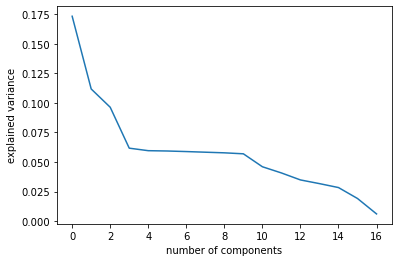

In [54]:
# Create scree plot on the data.
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [55]:
# Extracting eigenvalues
cov_matrix = np.dot(churn_normalized.T, churn_normalized) / churn.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

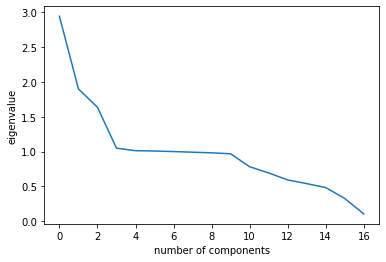

In [56]:
# Create scree plot again but for eigenvalue. No reason to use more than 9 components since everything after that is less than 1
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

In [57]:
# Output the loadings of the components
loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 
             'PC16', 'PC17'],
     index=churn.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Children,-0.000364,-0.002352,0.007231,0.559312,-0.046692,-0.129454,0.343141,0.410218,-0.080926,-0.610348,0.029019,-0.031575,0.013328,0.013681,0.021240,-0.007466,-0.019062
Age,0.005156,-0.015998,-0.018614,-0.505425,0.319979,0.096966,0.101094,0.067808,-0.717586,-0.314305,-0.051666,0.004946,-0.001541,-0.011504,0.010156,0.014605,0.021149
Income,-0.001063,0.009173,0.022878,0.212476,0.647241,-0.412169,0.355861,0.044634,-0.072876,0.476767,0.010140,-0.061884,0.009821,-0.000391,0.011802,0.004654,0.001774
Email,0.007781,-0.019627,-0.002397,-0.269814,-0.580445,-0.320103,0.245335,0.498654,-0.195649,0.368150,0.059248,-0.020585,0.023176,0.009403,-0.011041,0.000917,0.005078
Contacts,-0.011660,0.001619,-0.008939,-0.448897,0.340507,0.008983,-0.054208,0.544981,0.589311,-0.178682,0.037652,-0.021663,-0.002159,-0.026839,0.021617,0.001968,-0.002443
Yearly_equip_failure,-0.007275,0.008860,0.009610,0.297990,0.119861,0.669042,-0.203997,0.482227,-0.208734,0.359854,0.017490,0.024737,0.013842,-0.000408,0.014272,-0.021287,-0.002332
Tenure,-0.014440,0.700783,-0.078836,-0.015556,-0.001698,-0.035618,-0.046773,0.011840,-0.033910,-0.001541,0.005405,-0.010195,-0.007761,-0.012007,0.005977,0.006178,-0.705035
MonthlyCharge,-0.001166,0.038630,-0.015149,-0.144565,-0.078386,0.496876,0.797453,-0.199500,0.202983,0.056208,-0.025080,0.011715,0.018684,-0.003686,0.025147,-0.013210,-0.048156
Bandwidth_GB_Year,-0.016542,0.702206,-0.080316,0.005553,-0.012612,-0.002693,0.011087,0.007202,0.002330,-0.008313,0.012203,0.002861,-0.003527,-0.001226,-0.006627,0.006484,0.706738
Timely_Responses,0.458856,0.036648,0.280255,0.005174,-0.003465,0.031673,0.004492,0.013577,0.013598,-0.002550,-0.069873,-0.119533,0.046399,0.028535,-0.243543,0.791627,-0.001664


In [58]:
# Extract dataset with the 9 components retained.
churn_reduced = churn_pca.iloc[ : , 0:9]
print(churn_reduced)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     1.939402 -1.385771  1.905116  0.183722  0.197236  1.327012 -0.567704   
1    -0.194316 -1.679032  0.580869  0.887407 -1.139447  1.721469  0.637276   
2    -0.667431 -0.958021  0.266192  1.763870  0.189269  0.873016 -0.342856   
3     0.056293 -0.731358  2.253487 -1.059969 -0.796289 -0.969072 -1.077737   
4     1.340033 -1.946150  0.802377 -1.802066  0.448951  0.371161 -0.463230   
...        ...       ...       ...       ...       ...       ...       ...   
9881 -2.118051  1.952000  0.094676 -0.131781  0.658792 -0.968216  0.221549   
9882  1.908100  1.637575  0.581879 -0.401358 -0.682155 -0.313347  1.141504   
9883  1.442106  0.338316  0.019398  0.147981 -0.093932 -0.112844 -0.334481   
9884  2.001312  2.184055 -0.121293 -0.656453 -1.442623  0.488694  1.079446   
9885 -2.269793  1.554919 -0.824638 -0.295501 -1.749395 -0.658867  0.983543   

           PC8       PC9  
0    -0.538554 -1.200398  
1    -0.7

In [59]:
# Extract cleaned dataframe
churn.to_csv(r'C:\Users\12248\Desktop\WGU\D206 Data Cleaning\Cleaned_Churn_Data_PCA.csv')